In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [45]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

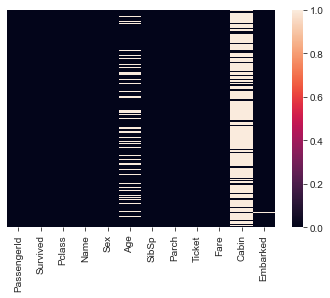

In [46]:
#to see where the data is missing
sns.heatmap(train.isnull(), yticklabels=False)

Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

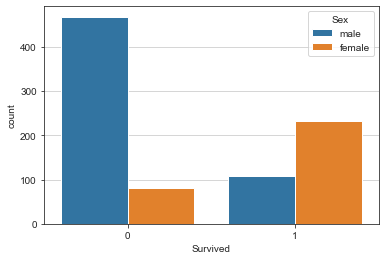

In [47]:
#to study survivors based on sex
sns.set_style("ticks", {'axes.grid':True}) #to get grid in the plots
sns.countplot(x='Survived', data=train, hue='Sex')

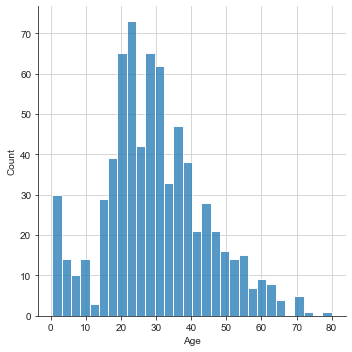

In [48]:
#study suvivors based on age
sns.displot(train['Age'].dropna(), bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

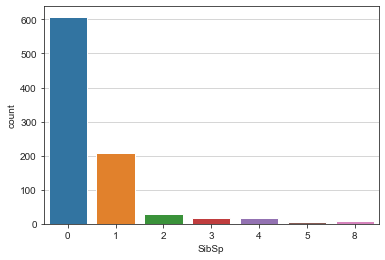

In [49]:
#siblings/spouse data
sns.countplot(x='SibSp', data=train)

In [50]:
#fare
train['Fare'].iplot(kind='hist', bins=30)

To fill in missing values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

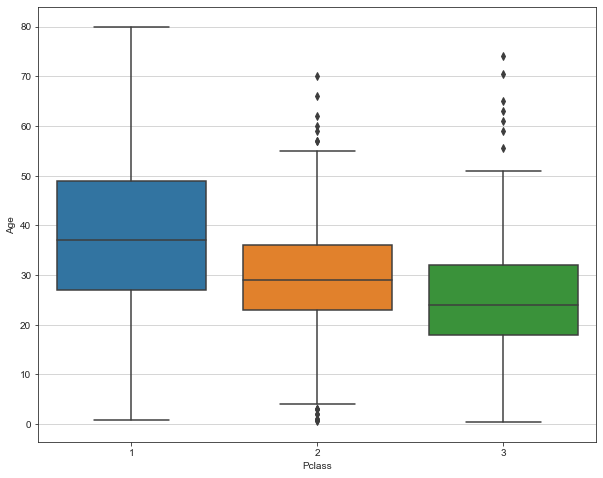

In [51]:
#pclass vs age to predict age wrt class
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [52]:
#function to fill in null values in age with average age wrt each class
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [53]:
#applying the function to the dataframe
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

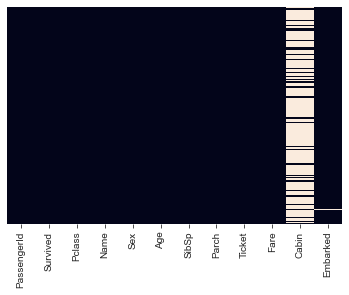

In [54]:
#checking if still there are any null values in age column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)